In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [3]:
# Читаем файл
data=pd.read_csv('events_AB_test.csv')

In [5]:
data.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


# Task 2
Вывести `основные` характеристики данных: количество записей, типы данных, проверка на наличие пропущенных значений.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   id       100000 non-null  bool 
 1   group    100000 non-null  bool 
 2   segment  100000 non-null  bool 
 3   events   100000 non-null  bool 
dtypes: bool(4)
memory usage: 390.8 KB


In [73]:
# Проверяем пустые ячейки
data[data.isnull().any(axis=1)]

,id,group,segment,events
3,50399,None,high,80.0


# Task 3
Провести описательную статистику по группам (`control и test`), а также по сегментам (`high и low`): среднее, медиана, стандартное отклонение

In [116]:
data.groupby(['group','segment'])['events'].agg(['mean', 'std', 'median'])

mean       std  median
group   segment                             
control high     59.970800  7.805347    60.0
        low      20.031575  4.473576    20.0
test    high     69.937494  8.403792    70.0
        low      33.025925  5.720845    33.0

In [108]:
data.groupby(['group','segment'])['events'].describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high      9999.0  69.937494  8.403792  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

# Task 4
Построить гистограммы распределения количества заказов по группам (`control и test`).


In [5]:
# Разделяем на группы
control_g=data[data['group']=='control']['events']
test_g=data[data['group']=='test']['events']

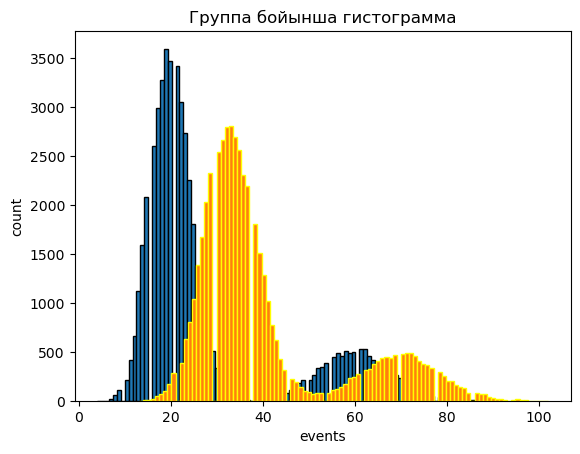

In [7]:
# Создание гистограмм
plt.hist(control_g,bins=100,edgecolor='black')
plt.hist(test_g,bins=100,edgecolor='yellow')
plt.title('Группа бойынша гистограмма')
plt.xlabel('events')
plt.ylabel('count')
plt.show()

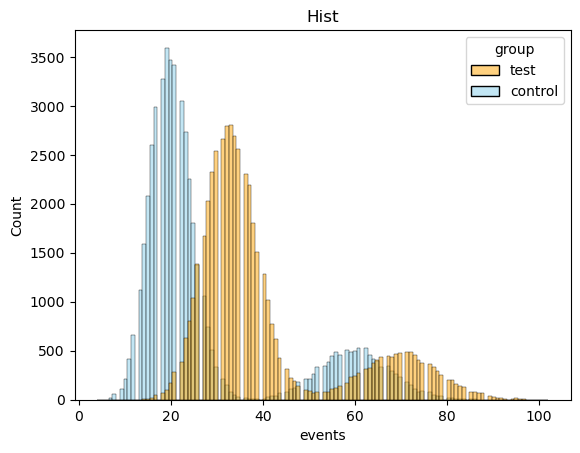

In [9]:
# Создание гистограмм на sns.
tuster={'control': 'skyblue', 'test': 'orange'}
sns.histplot(data=data,x='events',hue='group',palette=tuster)
plt.title('Hist')
plt.show()

# Task 5
Построить боксплоты (`box plots`) для наглядного сравнения распределений в группах

In [263]:
data.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [131]:
# Разделяем на группы
control_g=data[(data['group']=='control')]['events']
test_g=data[(data['group']=='test')]['events']

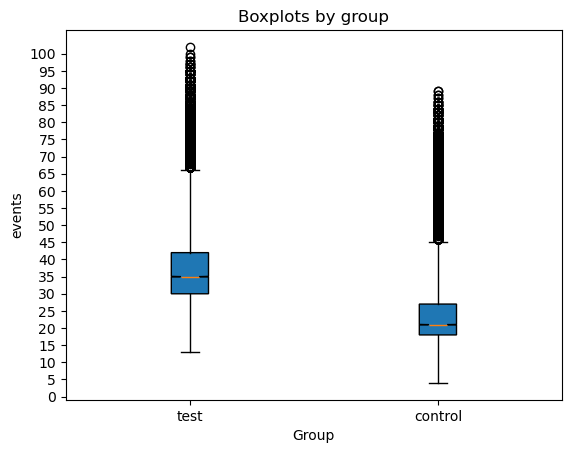

In [135]:
# Создание боксплот
data=[test_g,control_g]
n=['test','control']
plt.boxplot(data,patch_artist=True,notch=True,labels=n,whis=2)
plt.yticks(range(0,105,5))
plt.title('Boxplots by group')
plt.xlabel('Group')
plt.ylabel('events')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

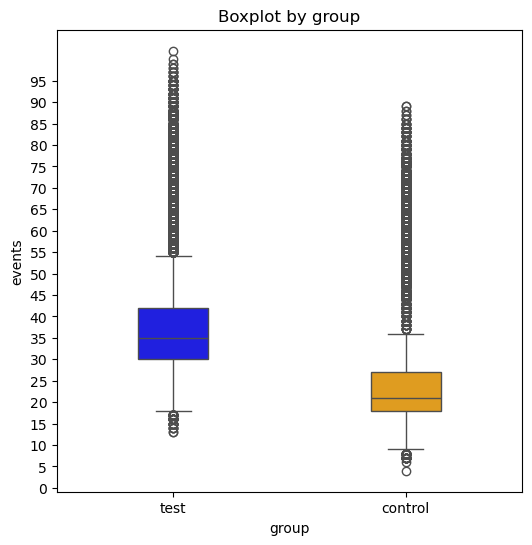

In [357]:
# Түстері
tus=['blue','orange']
# Графиктің көлемі
plt.figure(figsize=(6, 6))
# Боксплот
sns.boxplot(data=data,y='events', x='group', hue='group',palette=tus,width=0.3,whis=1)
# Имя
plt.title('Boxplot by group')
plt.yticks(range(0,100,5))
plt.show

# Task 6
Проверка нормальности распределения данных. Использовать тест `Шапиро-Уилка` для проверки нормальности распределения количества заказов в каждой группе.

Подсказка: Если `p-value` меньше `0.05`: Нулевая гипотеза отвергается, и можно заключить, что данные не нормально распределены. Если `p-value` больше `0.05`: Нет оснований отвергать нулевую гипотезу, и можно предположить, что данные нормально распределены.
`from scipy.stats import shapiro`
`shapiro()` можете прочитать документацию и примеры использования функции

In [11]:
# Разделяем результаты теста на тестовую и контрольную
c=data[(data['group']=='control')]['events']
t=data[(data['group']=='test')]['events']

In [13]:
# Тестим контрольную группу
st_c,pvalue_c=shapiro(c)
a=0.05
if pvalue_c>a:
    print('H0 is True')
else:
    print('H1 is True')

H1 is True


C:\Users\asd\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


In [222]:
pvalue_c

4.511764307942441e-122

In [208]:
# Тестим тестовую группу
st_t,pvalue_t=shapiro(t)
a=0.05
if pvalue_t>a:
    print('H0 is True')
else:
    print('H1 is True')

H1 is True


C:\Users\asd\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


In [228]:
pvalue_t

1.2434239803071742e-113

# Task 7
Построить график визуальной оценки `нормальности` распределения

In [15]:
import scipy.stats as stats
import seaborn as sns

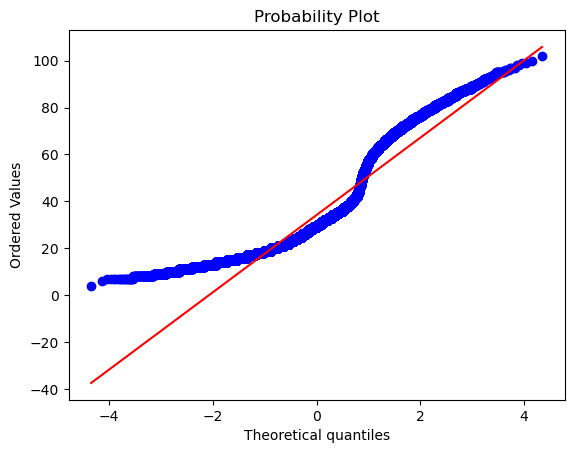

In [17]:
stats.probplot(data['events'],dist="norm", plot=plt)
plt.show()

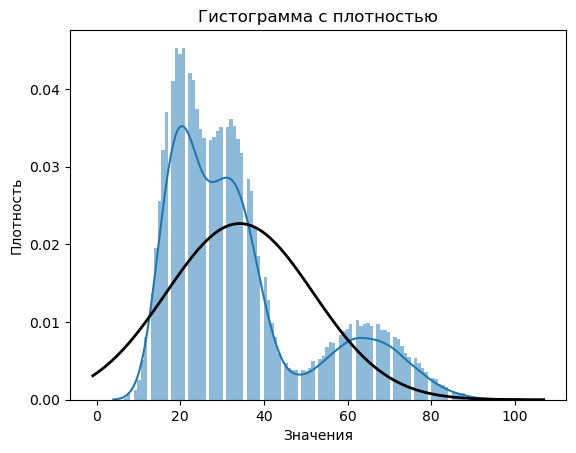

In [19]:
sns.histplot(data['events'], kde=True, stat="density", linewidth=0)
plt.title('Гистограмма с плотностью')
plt.xlabel('Значения')
plt.ylabel('Плотность')

# Наложение кривой нормального распределения
mu, std = np.mean(data['events']), np.std(data['events'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# LAST Task 
**H0 (нөлдік гипотеза)** - группалар арасында `өзгеріс жоқ`, бұрыңғы батырмa қалу керек.

**H1 (альтернативті гипотеза)** - жаңа батырмаға ауыстыру керек, группалар арасында айтарлықтай `өзгеріс бар`.

In [101]:
from scipy.stats import mannwhitneyu

**`Группа` бойынша тест**

In [199]:
control_g=data[(data['group']=='control')]['events']
test_g=data[(data['group']=='test')]['events']

In [201]:
U,p_value=mannwhitneyu(control_g,test_g)
a=0.05
if p_value>a:
    print('H0 is True')
else:
    print('H1 is True')

H1 is True


**`high` бойынша тест**

In [139]:
t_h=data[(data['group']=='test') & (data['segment']=='high')]['events']
c_h=data[(data['group']=='control') & (data['segment']=='high')]['events']

In [167]:
U,p_value=mannwhitneyu(t_h,c_h)
a=0.05
if p_value>a:
    print('H0 is True')
else:
    print('H1 is True')

H1 is True


**`low` бойынша тест**

In [197]:
c_l=data[(data['group']=='control') & (data['segment']=='low')]['events']
t_l=data[(data['group']=='test') & (data['segment']=='low')]['events']

In [193]:
U,p_value=mannwhitneyu(t_l,c_l)
a=0.05
if p_value>a:
    print('H0 is True')
else:
    print('H1 is True')

H1 is True


# Conclusion

`АВ` тест қорытындысы бойынша екі группаның арасында айтарлықтай айырмашылық бар, және де альтернативті гипотеза дұрыс деп айта аламын. Сегмент бойынша да нәтижелер бірдей.

`H1` (альтернативті гипотеза) - жаңа батырмаға `ауыстыру` керек, группалар арасында айтарлықтай өзгеріс бар